# GAME OF THRONES : NETWORK ANALYSIS
'Game of thrones' is an extremely popular TV series. It is an adaptation of A Song of Ice and Fire, George R. R. Martin's series of fantasy novels, the first of which is A Game of Thrones. In this notebook, we will analyze the co-occurrence network of the characters in the Game of Thrones books.

These networks were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in A Song of Ice and Fire.
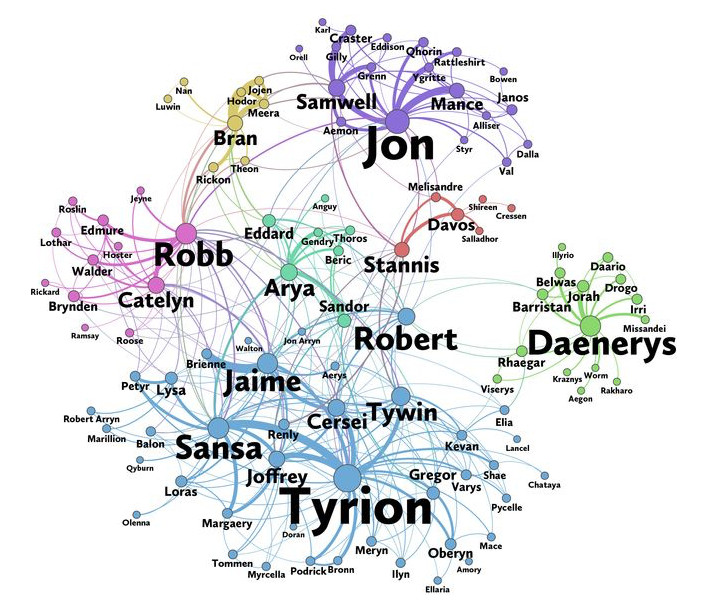
## 1. Where are my datasets ?
The dataset consists of csv files i.e. comma-separated files. This makes it very easy for us to load the dataframe. Load the data for first book.


In [1]:
#import modules
import pandas as pd

# Read datasets/book1.csv
book1 = pd.read_csv('datasets/book1.csv')
 
# Printing out the head of the dataset
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   Book  
0     1  
1     1  
2     1  
3     1  
4     1  


## 2. Change them up
The resulting DataFrame consists of 5 columns : Source, Target, Type, weight and Book. 
- Source and target are the two nodes linked by an edge. 
- Weight tells us the number of interactions the characters have had throughout the book and the book column tells the book number. 

We can change the column name 'weight' to 'interactions' and display the DataFrame as a styler object.

In [2]:
# change the column names
book1.rename(columns = {'weight':'Interactions'}, inplace = True)

# df.style() returns a styler object
book1.head().style


,Source,Target,Type,Interactions,Book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


## 3. My network has just begun
After loading the data, we can import the networkx module that allows us to create and manipulate complex networks. Then create an empty graph for our first book.


In [3]:
# Import module as an alias
import networkx as nx

# Create an empty graph
G_book1 = nx.Graph()

## 4. Everything is better with some graphs in the network
Our first graph is empty, we can start adding edges to it from book 1. Also, lets load the rest of the books and repeat the same process for them using iteration.

In [4]:
# Add edges to the dataframe using iteration
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['Interactions'])
    
# you may use print(G_book1.edges()) to see all the edges

# Create a list of networks for all the books

#load rest of the books and make necessary changes
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    book.rename(columns = {'weight':'Interactions'}, inplace = True)

#create a graph object and itearte through rest of the books to add edges.
#append this to books
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['Interactions'])
    books.append(G_book)
    display(book.head())


,Source,Target,Type,Interactions,Book
0,Aegon-I-Targaryen,Harren-Hoare,Undirected,4,2.0
1,Aegon-I-Targaryen,Nan,Undirected,3,2.0
2,Aegon-I-Targaryen,Rhaenys-Targaryen,Undirected,4,2.0
3,Aegon-I-Targaryen,Tyrion-Lannister,Undirected,3,2.0
4,Aegon-I-Targaryen,Visenya-Targaryen,Undirected,3,2.0


,Source,Target,Type,Interactions,Book
0,Addam-Marbrand,Gyles-Rosby,Undirected,3,3
1,Addam-Marbrand,Jaime-Lannister,Undirected,3,3
2,Addam-Marbrand,Jalabhar-Xho,Undirected,3,3
3,Addam-Marbrand,Joffrey-Baratheon,Undirected,3,3
4,Addam-Marbrand,Kevan-Lannister,Undirected,3,3


,Source,Target,Type,Interactions,Book
0,Addam-Marbrand,Brynden-Tully,undirected,3,4
1,Addam-Marbrand,Cersei-Lannister,undirected,3,4
2,Addam-Marbrand,Jaime-Lannister,undirected,8,4
3,Addam-Marbrand,Lyle-Crakehall,undirected,4,4
4,Aegon-Targaryen-(son-of-Rhaegar),Rhaegar-Targaryen,undirected,3,4


,Source,Target,Type,Interactions,Book
0,Aegon-I-Targaryen,Daenerys-Targaryen,undirected,4,5
1,Aegon-Targaryen-(son-of-Rhaegar),Daenerys-Targaryen,undirected,11,5
2,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,undirected,4,5
3,Aegon-Targaryen-(son-of-Rhaegar),Franklyn-Flowers,undirected,3,5
4,Aegon-Targaryen-(son-of-Rhaegar),Haldon,undirected,14,5


## 5. The things I do for no reason
Here, I am just trying to visualize the graph and playing around. It's clearly visible just how dense our graph is. This is the graphical visualization of book 1 only and you can see how populated it is.

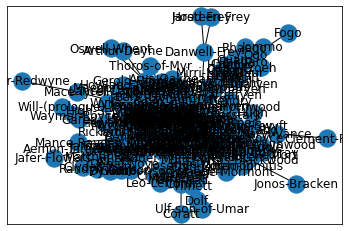

In [5]:
from IPython.core.display import HTML

#try to visualize the graph of book 1
#when with_labels is set to 1, we get labelled nodes

nx.draw_networkx(G_book1,with_labels=1)

#aligning my graph in the center
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


## 6.  Importance is wind, my friend.
Who is the most important character in Game of Thrones? Is it Jon Snow, Daenerys, Tyrion or someone else ? 
We can easily calculate this using the networkx module. 
The importance of a node can be calculated using a metric 'degree centrality'. It gives us the measure of the number of nodes a given node is connected to. Here, it will tell us which characters have most interactions.

Let's start by extracting the top ten important characeters from the first book and the fifth book.


In [6]:
# Calculate the degree centrality of book 1 and book 5
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book5 = nx.degree_centrality(books[4])

# Sort the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]

# Print out the top 10 of book1 and book5
display("Top 10 important characters of book 1 : " ,sorted_deg_cen_book1)
display("Top 10 important characters of book 5 : " ,sorted_deg_cen_book5)

'Top 10 important characters of book 1 : '

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

'Top 10 important characters of book 5 : '

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038)]

## 7. Evolution is coming
It is evident from the degree centrality metric that the importance of characters changes over the course of the book. The most important character in the first book is Eddard Stark but he is not even in the top 10 (actually if you check for top 20 he is not even in that) in the fifth book.

Let's look a at the evolution of degree centrality of a couple of characters which showed up in the top 10 of degree centrality in the first book.

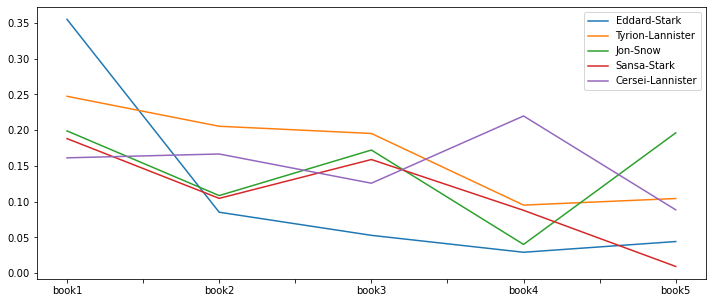

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Create a DataFrame from the list of degree centralities in all the books
idx = ['book1', 'book2', 'book3', 'book4', 'book5']
    
degree_evol_df = pd.DataFrame.from_records(evol, index=idx).fillna(0)

# Plot the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow

degree_evol_df.plot(y=['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow','Sansa-Stark','Cersei-Lannister'],figsize=(12,5))

## 8. Betweeness always connects

We can see that the importance of Eddard Stark dies off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book. Also, Stannis Baratheon who was not a part of top 10 in the first book is the second important character in book 5. If anything, the book series is totally unpredictable.

Now let's look at various other measures like Betweenness Centrality and PageRank to find important characters in our Game of Thrones character co-occurrence network and see if we can uncover some more interesting facts about this network. 

Let's plot the evolution of betweenness centrality of this network over the five books. We will take the evolution of the top four characters of every book and plot it.

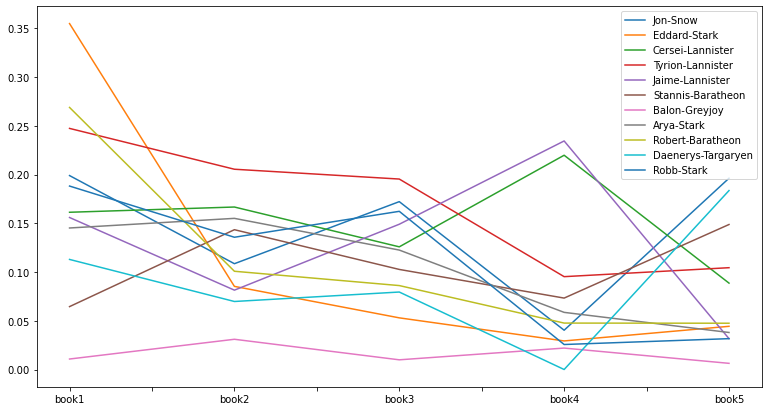

In [8]:
# Create a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book) for book in books]

# Make a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Find the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plot the evolution of the top characters
degree_evol_df[list_of_char].plot(figsize=(13,7))

['Jon-Snow',
 'Eddard-Stark',
 'Cersei-Lannister',
 'Tyrion-Lannister',
 'Jaime-Lannister',
 'Stannis-Baratheon',
 'Balon-Greyjoy',
 'Arya-Stark',
 'Robert-Baratheon',
 'Daenerys-Targaryen',
 'Robb-Stark']

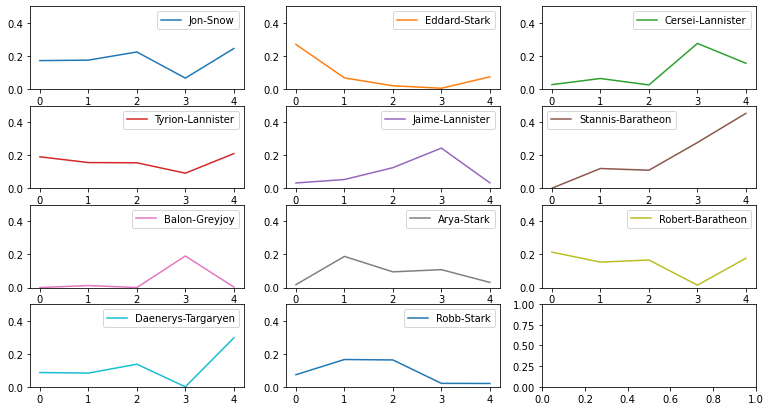

In [9]:
# Plot the evolution of the top characters in subplot
display(list_of_char)

my_colors = plt.rcParams['axes.prop_cycle']() #note that we CALL the prop_cycle
fig, axes = plt.subplots(nrows=4, ncols=3)    

for i in range(3):
    for j in range(3):
        betweenness_evol_df.plot(ax=axes[i, j], y=list_of_char[i*3+j], figsize=(13, 7), ylim=(0, 0.5),**next(my_colors))
for j in range(2):
    betweenness_evol_df.plot(ax=axes[3, j], y=list_of_char[9+j], figsize=(13, 7), ylim=(0, 0.5),**next(my_colors))

## 9. Pagerank remembers
We see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.

PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank.

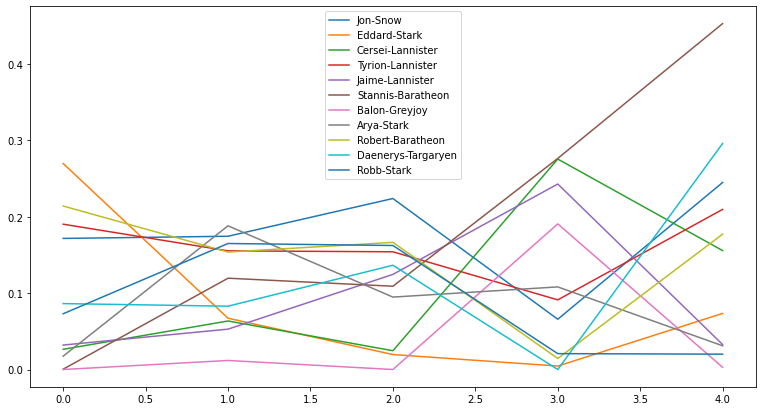

In [10]:
# Create a list of pagerank of all the characters in all the books
evol = [nx.betweenness_centrality(book) for book in books]

# Make a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Find the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plot the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

## 10. When you play the game of correlation
Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank. Eddard Stark follows a similar curve but for degree centrality and betweenness centrality: He is important in the first book but dies into oblivion over the book series.

We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?

Let's look at the correlation between PageRank, Betweenness centrality and Degree centrality for the fifth book using Pearson correlation.

In [11]:
# Create a list of pagerank, betweenness centrality, degree centrality of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), nx.betweenness_centrality(books[4], weight='weight'), nx.degree_centrality(books[4])]

# Create the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculate the correlation
cor.T.corr()


,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


## 11. I analyze and I know things

We see a high correlation between these three measures for our character co-occurrence network.

So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these three measures?

In [15]:
# Find the most important character in the fifth book according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Print out the top character according to the three measures
print('Degree centrality : ',d_cent, '\nBetweenness centrality : ',b_cent, '\nPageRank : ',p_rank)


Degree centrality :  Jon-Snow 
Betweenness centrality :  Stannis-Baratheon 
PageRank :  Jon-Snow
